In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set=pd.read_csv("Mall_Customers.csv")
data_set.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
data_set.drop(["CustomerID"],axis=1,inplace=True)
data_set

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
from sklearn.preprocessing import LabelEncoder
gender_encoder=LabelEncoder()
data_set["Gender"]=gender_encoder.fit_transform(data_set["Gender"].values)

In [5]:
data_set

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


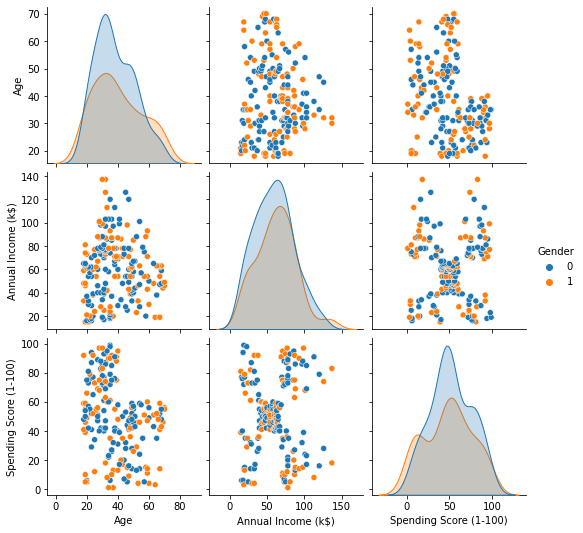

In [6]:
sns.pairplot(data_set,hue="Gender")
plt.show()

## #Annual Income (k$) vs	Spending Score (1-100)

In [7]:
x=data_set.iloc[:,2:].values

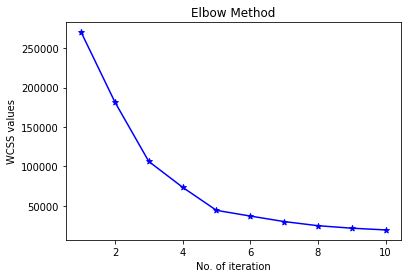

In [8]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


plt.scatter(range(1,11),wcss,c="blue",marker="*")
plt.plot(range(1,11),wcss,"b")
plt.xlabel("No. of iteration")
plt.ylabel("WCSS values")
plt.title("Elbow Method")
plt.show()

In [9]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_pred=kmeans.fit_predict(x)

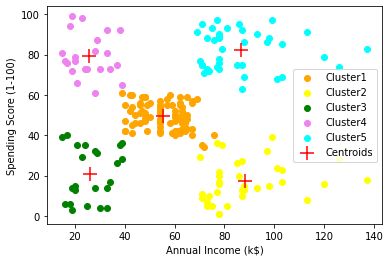

In [10]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],c="orange",label="Cluster1")
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],c="yellow",label="Cluster2")
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],c="green",label="Cluster3")
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],c="violet",label="Cluster4")
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],c="cyan",label="Cluster5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c="red",marker="+",label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

## Age vs Spending Score (1-100)

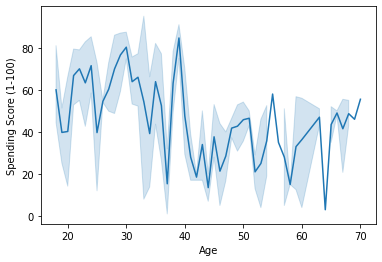

In [12]:
sns.lineplot(x="Age",y="Spending Score (1-100)",data=data_set)
plt.show()

In [15]:
x=data_set.iloc[:,1::2].values

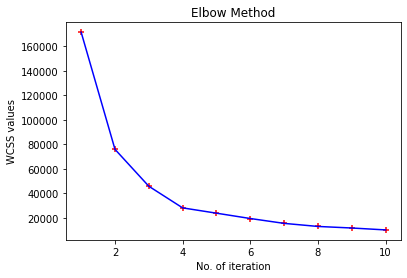

In [16]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.scatter(range(1,11),wcss,c="red",marker="+")
plt.plot(range(1,11),wcss,"b")
plt.xlabel("No. of iteration")
plt.ylabel("WCSS values")
plt.title("Elbow Method")
plt.show()

In [17]:
kmaens=KMeans(n_clusters=4,init="k-means++",random_state=42)

In [26]:
y_pred=kmeans.fit_predict(x)
y_pred.max()

9

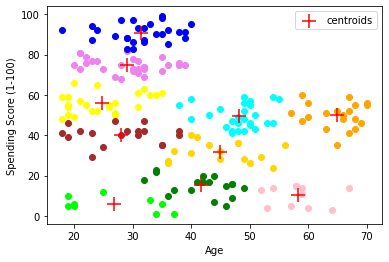

In [29]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],c="cyan")
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],c="violet")
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],c="green")
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],c="yellow")
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],c="blue")
plt.scatter(x[y_pred==5,0],x[y_pred==5,1],c="orange")
plt.scatter(x[y_pred==6,0],x[y_pred==6,1],c="brown")
plt.scatter(x[y_pred==7,0],x[y_pred==7,1],c="pink")
plt.scatter(x[y_pred==8,0],x[y_pred==8,1],c="lime")
plt.scatter(x[y_pred==9,0],x[y_pred==9,1],c="gold")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c="red",s=200,label="centroids",marker="+")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()